In [10]:
import pandas as pd
import numpy as np
from datascience import *
from sklearn.linear_model import LinearRegression, BayesianRidge, ARDRegression, SGDRegressor, LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, VotingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True
import warnings
warnings.simplefilter('ignore')

In [11]:
df = pd.read_csv('extracted_dataset.csv')
df.head()

,Course Code,Course Title,Type,Course Year,Student Number,Department Code,Course Level,GPA,Standing,Completed Credits,...,GPA Student - Subject,Avg. Grade - Taken,Avg. Grade - Students_Subject,Letter Grade,Status,Semester,Theoritical,Practical,Course Credit,ECTS
0,UNI 113,Textual Analysis and Effective Com. I,NaN,1,351,IE,Undergraduate,4.05,Freshman,18,...,4.050000,2.120833,2.703226,A+,Successful,2010 - Fall,3,0,3,5
1,MGT 553,Yöneticiler İçin Hukuk,NaN,5,1181,MBA/NT,Graduate,3.38,Freshman,15,...,3.400000,3.228571,3.353425,B+,Successful,2010 - Fall,3,0,3,5
2,EM 475,Stratejik Yönetim,NaN,4,1227,MBA/NT,Graduate,3.00,Freshman,15,...,3.300000,3.227273,3.227273,B+,Successful,2010 - Fall,3,0,3,5
3,MGT 511,Küresel Yönetim Düşüncesi,NaN,5,1182,MBA/NT,Graduate,3.54,Freshman,15,...,3.500000,3.576471,3.353425,A-,Successful,2010 - Fall,3,0,3,5
4,UNI 101,Mathematical Reasoning,NaN,1,344,EE,Undergraduate,4.03,Freshman,18,...,4.033333,2.144444,2.703226,A,Successful,2010 - Fall,3,0,3,5


In [12]:
grad_courses = []
for idx in df.index:
    if df.iloc[idx, 3] > 4:
        grad_courses.append(idx)
for row_index in grad_courses:
    df.drop(row_index, inplace=True)
df.index = range(len(df))
df

,Course Code,Course Title,Type,Course Year,Student Number,Department Code,Course Level,GPA,Standing,Completed Credits,...,GPA Student - Subject,Avg. Grade - Taken,Avg. Grade - Students_Subject,Letter Grade,Status,Semester,Theoritical,Practical,Course Credit,ECTS
0,UNI 113,Textual Analysis and Effective Com. I,NaN,1,351,IE,Undergraduate,4.05,Freshman,18,...,4.050000,2.120833,2.703226,A+,Successful,2010 - Fall,3,0,3,5
1,EM 475,Stratejik Yönetim,NaN,4,1227,MBA/NT,Graduate,3.00,Freshman,15,...,3.300000,3.227273,3.227273,B+,Successful,2010 - Fall,3,0,3,5
2,UNI 101,Mathematical Reasoning,NaN,1,344,EE,Undergraduate,4.03,Freshman,18,...,4.033333,2.144444,2.703226,A,Successful,2010 - Fall,3,0,3,5
3,UNI 203,Understanding Science and Technology,NaN,2,344,EE,Undergraduate,4.03,Freshman,18,...,4.033333,3.176000,2.703226,A,Successful,2010 - Fall,3,0,3,5
4,UNI 203,Understanding Science and Technology,NaN,2,240,SOC,Undergraduate,2.62,Freshman,18,...,2.616667,3.176000,2.703226,B,Successful,2010 - Fall,3,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44151,PHYS 104L,Physics II - Lab,NaN,1,2001,CS,Undergraduate,2.57,Freshman,21,...,3.000000,2.567082,2.166329,A-,Successful,2014 - Spring,0,2,1,1
44152,EECS 202,Basic Digital Communication with Networking,NaN,2,1313,EE,Undergraduate,2.40,Sophomore,19,...,1.740000,1.980226,2.278289,B-,Successful,2014 - Spring,3,2,4,6
44153,UNI 117,Understanding Society and Culture,NaN,1,2006,EE,Undergraduate,1.49,Freshman,18,...,2.000000,1.923731,2.448116,D,Successful,2014 - Spring,3,0,3,5
44154,EECS 218,Digital Logic Design,NaN,2,1310,EE,Undergraduate,1.86,Sophomore,15,...,0.833333,2.274528,2.278289,F,Unsuccessful,2014 - Spring,3,0,3,5


In [13]:
df.drop([df.columns[0], df.columns[1], df.columns[2], df.columns[4]], inplace=True, axis=1)
df.head()

,Course Year,Department Code,Course Level,GPA,Standing,Completed Credits,Completed ECTS,GPA Student - Subject,Avg. Grade - Taken,Avg. Grade - Students_Subject,Letter Grade,Status,Semester,Theoritical,Practical,Course Credit,ECTS
0,1,IE,Undergraduate,4.05,Freshman,18,30,4.050000,2.120833,2.703226,A+,Successful,2010 - Fall,3,0,3,5
1,4,MBA/NT,Graduate,3.00,Freshman,15,25,3.300000,3.227273,3.227273,B+,Successful,2010 - Fall,3,0,3,5
2,1,EE,Undergraduate,4.03,Freshman,18,30,4.033333,2.144444,2.703226,A,Successful,2010 - Fall,3,0,3,5
3,2,EE,Undergraduate,4.03,Freshman,18,30,4.033333,3.176000,2.703226,A,Successful,2010 - Fall,3,0,3,5
4,2,SOC,Undergraduate,2.62,Freshman,18,30,2.616667,3.176000,2.703226,B,Successful,2010 - Fall,3,0,3,5


In [14]:
df = pd.concat([df, pd.get_dummies(df['Course Year'], prefix='Course Year'), pd.get_dummies(df['Department Code'], prefix='Department Code'), pd.get_dummies(df['Course Level'], prefix='Course Level'), pd.get_dummies(df['Standing'], prefix='Standing'), pd.get_dummies(df['Status'], prefix='Status')], axis=1)
df.drop(['Course Year', 'Department Code', 'Course Level', 'Status', 'Standing'], axis=1, inplace=True)
df

,GPA,Completed Credits,Completed ECTS,GPA Student - Subject,Avg. Grade - Taken,Avg. Grade - Students_Subject,Letter Grade,Semester,Theoritical,Practical,...,Department Code_İHP,Course Level_Graduate,Course Level_Undergraduate,Standing_Freshman,Standing_Junior,Standing_Senior,Standing_Sophomore,Status_Recorded,Status_Successful,Status_Unsuccessful
0,4.05,18,30,4.050000,2.120833,2.703226,A+,2010 - Fall,3,0,...,0,0,1,1,0,0,0,0,1,0
1,3.00,15,25,3.300000,3.227273,3.227273,B+,2010 - Fall,3,0,...,0,1,0,1,0,0,0,0,1,0
2,4.03,18,30,4.033333,2.144444,2.703226,A,2010 - Fall,3,0,...,0,0,1,1,0,0,0,0,1,0
3,4.03,18,30,4.033333,3.176000,2.703226,A,2010 - Fall,3,0,...,0,0,1,1,0,0,0,0,1,0
4,2.62,18,30,2.616667,3.176000,2.703226,B,2010 - Fall,3,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44151,2.57,21,33,3.000000,2.567082,2.166329,A-,2014 - Spring,0,2,...,0,0,1,1,0,0,0,0,1,0
44152,2.40,19,31,1.740000,1.980226,2.278289,B-,2014 - Spring,3,2,...,0,0,1,0,0,0,1,0,1,0
44153,1.49,18,28,2.000000,1.923731,2.448116,D,2014 - Spring,3,0,...,0,0,1,1,0,0,0,0,1,0
44154,1.86,15,24,0.833333,2.274528,2.278289,F,2014 - Spring,3,0,...,0,0,1,0,0,0,1,0,0,1


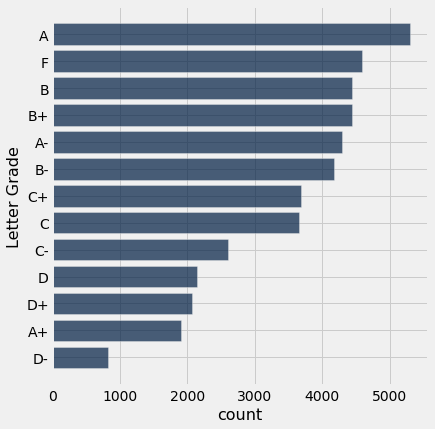

In [15]:
Table().with_column('Letter Grade', df['Letter Grade']).group(0).sort('count', descending=True).barh('Letter Grade')

In [16]:
columns = df.columns
columns

Index(['GPA', 'Completed Credits', 'Completed ECTS', 'GPA Student - Subject',
       'Avg. Grade - Taken', 'Avg. Grade - Students_Subject', 'Letter Grade',
       'Semester', 'Theoritical', 'Practical', 'Course Credit', 'ECTS',
       'Course Year_1', 'Course Year_2', 'Course Year_3', 'Course Year_4',
       'Department Code_CS', 'Department Code_CTV', 'Department Code_CULT/T',
       'Department Code_DSE/T', 'Department Code_ECE/NT',
       'Department Code_ECE/T', 'Department Code_EE', 'Department Code_HIST',
       'Department Code_HIST PhD', 'Department Code_HIST/T',
       'Department Code_HUK', 'Department Code_IE', 'Department Code_ISE/NT',
       'Department Code_ISE/T', 'Department Code_ISS', 'Department Code_ITM',
       'Department Code_LIT', 'Department Code_MBA/NT', 'Department Code_MGT',
       'Department Code_MTS/T', 'Department Code_PHIL', 'Department Code_POLS',
       'Department Code_POLS/NT', 'Department Code_POLS/T',
       'Department Code_PSY', 'Department Code_

In [24]:
le = LabelEncoder()
le.fit(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F'])

LabelEncoder()

In [25]:
def get_train_data(df, train_sem, columns):
    dataFrame = pd.DataFrame(columns=columns)
    for sem in train_sem:
        dataFrame = pd.concat([dataFrame, df[df.iloc[:, 7] == sem]], ignore_index=True)
    for idx in dataFrame.index:
        semester = dataFrame.iloc[idx, 7]
        dataFrame.iloc[idx, 7] = semester.split()[2].strip()
    
    X_train = dataFrame.drop('Semester', axis=1)
    y_train = le.transform(X_train.pop('Letter Grade'))
    return X_train, y_train

In [26]:
def normalize_X(X):
    cols = X.columns
    sc = StandardScaler()
    X = sc.fit_transform(X)
    return pd.DataFrame(X, columns=cols)

In [27]:
def get_error_score(df, columns, model):
    error_scores = {}
    sorted_semesters = sorted(set(df.iloc[:, 7]))
    for sem_idx in range(1, len(sorted_semesters)):
        training_sem = sorted_semesters[:sem_idx]
        test_sem = sorted_semesters[sem_idx]
        X_train, y_train = get_train_data(df, training_sem, columns)
        X_test = df[df.iloc[:, 7] == test_sem]
        X_test.drop('Semester', axis=1, inplace=True)
        y_test = le.transform(X_test.pop('Letter Grade'))
        
        X_train = normalize_X(X_train)
        X_test = normalize_X(X_test)
        model.fit(X_train, y_train)
        
        y_pred_test = model.predict(X_test)
        mae_test = round(mean_absolute_error(y_test, y_pred_test), 3)
        mse_test = round(mean_squared_error(y_test, y_pred_test), 3)
        r2_test = round(r2_score(y_test, y_pred_test), 3)
        
        y_pred_train = model.predict(X_train)
        mae_train = round(mean_absolute_error(y_train, y_pred_train),3)
        mse_train = round(mean_squared_error(y_train, y_pred_train),3)
        r2_train = round(r2_score(y_train, y_pred_train),3)
        
        error_scores.setdefault(sem_idx, {})
        error_scores[sem_idx]['mae'] = [mae_train, mae_test]
        error_scores[sem_idx]['mse'] = [mse_train, mse_test]
        error_scores[sem_idx]['r2'] = [r2_train, r2_test]        
        
    return error_scores

In [51]:
def plot_error_score(df, columns, model):
    scores = get_error_score(df, columns, model)
    table = Table().with_column('Number of Training Semesters', scores.keys())
    error_scores = {}
    for k in sorted(scores):
        for metric in scores[k]:
            error_scores.setdefault(metric + ' train', [])
            error_scores[metric + ' train'].append(scores[k][metric][0])
            error_scores.setdefault(metric + ' test', [])
            error_scores[metric + ' test'].append(scores[k][metric][1])
    
    for model in error_scores:
        table = table.with_column(model, error_scores[model])

    table.plot('Number of Training Semesters')
    return table

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,1.412,1.867,3.222,5.684,0.768,0.637
2,1.475,1.26398e+12,3.554,2.41722e+24,0.766,-1.90058e+23
3,1.465,1.35859e+13,3.446,1.44585e+27,0.77,-1.09223e+26
4,1.432,4.86086e+12,3.274,2.25544e+26,0.762,-1.79443e+25
5,1.455,9.94469e+11,3.362,1.53699e+24,0.745,-1.25984e+23
6,1.439,3.09825e+12,3.274,4.69522e+25,0.751,-3.29287e+24
7,1.434,2.80834e+12,3.274,2.04248e+25,0.762,-1.46445e+24
8,1.444,3.86125e+12,3.304,3.53416e+25,0.761,-2.1998e+24
9,1.449,4.13772e+12,3.326,2.96152e+25,0.761,-2.15165e+24
10,1.436,5.82825e+11,3.281,1.6821e+24,0.763,-1.21785e+23


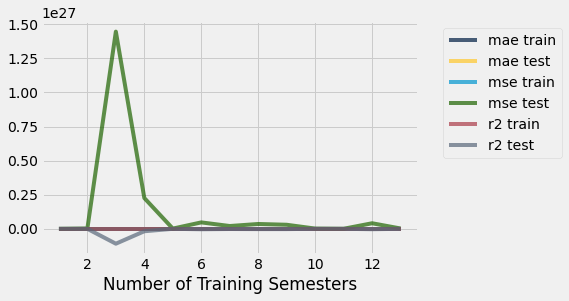

In [52]:
plot_error_score(df, columns, LinearRegression())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,1.421,1.865,3.246,5.659,0.767,0.639
2,1.48,1.588,3.557,3.734,0.766,0.706
3,1.464,1.556,3.453,3.711,0.769,0.72
4,1.431,1.481,3.273,3.481,0.762,0.723
5,1.444,1.457,3.306,3.138,0.749,0.743
6,1.439,1.495,3.271,3.602,0.751,0.747
7,1.428,1.472,3.249,3.419,0.764,0.755
8,1.442,1.696,3.303,4.362,0.761,0.729
9,1.449,1.441,3.325,3.323,0.761,0.759
10,1.436,1.479,3.281,3.509,0.763,0.746


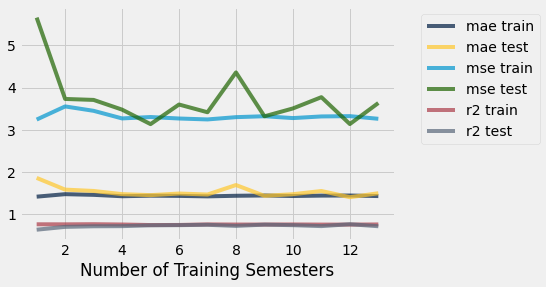

In [53]:
plot_error_score(df, columns, BayesianRidge())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,1.425,1.849,3.236,5.59,0.767,0.643
2,1.472,1.601,3.555,3.831,0.766,0.699
3,1.461,1.561,3.453,3.72,0.769,0.719
4,1.433,1.484,3.288,3.497,0.761,0.722
5,2.429,1.611,1099.2,3.958,-82.323,0.676
6,4.455,6.871,4543.9,2734.96,-344.795,-190.81
7,79.033,78.535,2.16424e+07,28782.1,-1.57554e+06,-2062.66
8,1046.88,1538.83,2.10943e+09,6.9448e+07,-1.52712e+08,-4.32272e+06
9,1391.57,2260.32,5.20021e+09,5.14902e+09,-3.74135e+08,-3.74095e+08
10,74962.6,66919.2,1.08756e+12,5.07095e+10,-7.84739e+10,-3.67139e+09


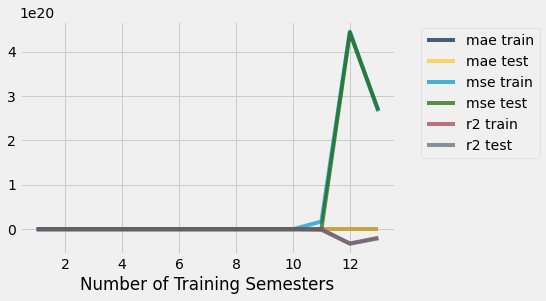

In [55]:
plot_error_score(df, columns, SGDRegressor())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,1.261,1.499,2.898,4.64,0.792,0.704
2,1.394,1.444,3.265,3.103,0.785,0.756
3,1.387,1.445,3.236,3.495,0.784,0.736
4,1.397,1.404,3.214,3.312,0.766,0.736
5,1.387,1.451,3.159,3.552,0.761,0.709
6,1.37,1.424,3.113,3.48,0.763,0.756
7,1.338,1.386,3.102,3.328,0.774,0.761
8,1.318,1.522,3.094,4.047,0.776,0.748
9,1.342,1.37,3.169,3.298,0.772,0.76
10,1.382,1.483,3.277,3.73,0.764,0.73


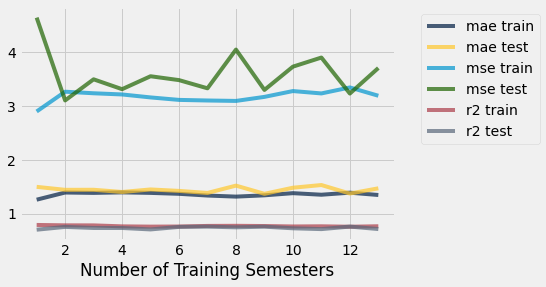

In [57]:
plot_error_score(df, columns, AdaBoostRegressor())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,0.475,1.698,0.577,5.634,0.959,0.641
2,0.525,1.354,0.671,3.065,0.956,0.759
3,0.572,1.49,0.773,4.018,0.948,0.696
4,0.517,1.366,0.629,3.448,0.954,0.726
5,0.531,1.332,0.63,3.271,0.952,0.732
6,0.518,1.333,0.6,3.345,0.954,0.765
7,0.491,1.374,0.582,3.393,0.958,0.757
8,0.487,1.509,0.555,4.071,0.96,0.747
9,0.482,1.325,0.555,3.219,0.96,0.766
10,0.47,1.396,0.535,3.427,0.961,0.752


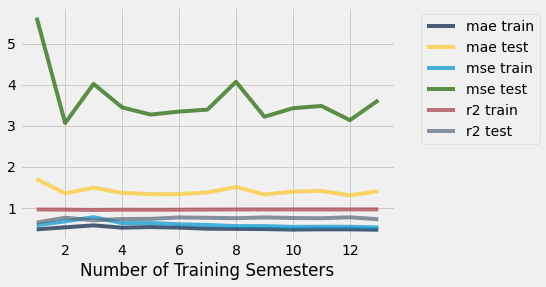

In [58]:
plot_error_score(df, columns, BaggingRegressor())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,1.918,2.32,5.252,7.994,0.622,0.49
2,2.01,1.621,5.601,4.077,0.632,0.679
3,1.976,1.82,5.5,4.829,0.633,0.635
4,1.862,1.749,5.055,4.673,0.632,0.628
5,1.834,1.672,4.963,4.352,0.624,0.643
6,1.82,1.953,4.896,5.502,0.627,0.614
7,1.805,1.879,4.846,5.135,0.647,0.632
8,1.83,2.179,4.93,6.774,0.643,0.578
9,1.836,1.828,4.943,4.832,0.644,0.649
10,1.827,1.893,4.922,5.261,0.645,0.619


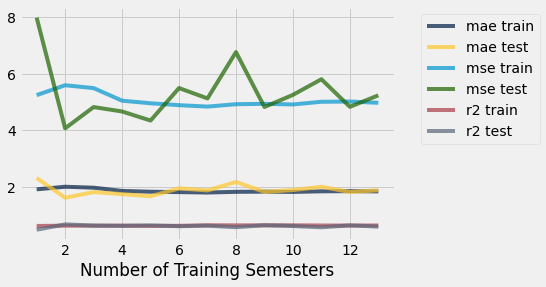

In [59]:
plot_error_score(df, columns, Lasso())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,0.435,1.646,0.413,5.358,0.97,0.658
2,0.527,1.344,0.564,2.553,0.963,0.799
3,0.532,1.393,0.561,3.547,0.963,0.732
4,0.476,1.329,0.473,3.226,0.966,0.743
5,0.488,1.346,0.465,3.228,0.965,0.735
6,0.48,1.325,0.451,3.252,0.966,0.772
7,0.451,1.313,0.431,3.104,0.969,0.777
8,0.444,1.443,0.407,3.733,0.971,0.768
9,0.446,1.267,0.414,2.948,0.97,0.786
10,0.429,1.351,0.394,3.201,0.972,0.768


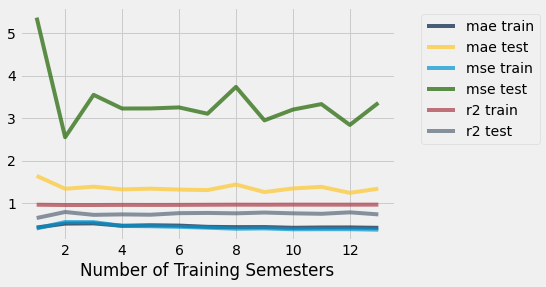

In [60]:
plot_error_score(df, columns, RandomForestRegressor())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,1.412,1.871,3.222,5.704,0.768,0.636
2,1.474,1.597,3.55,3.743,0.767,0.706
3,1.461,1.602,3.44,3.931,0.77,0.703
4,1.428,1.487,3.27,3.522,0.762,0.72
5,1.444,1.465,3.306,3.175,0.749,0.74
6,1.438,1.493,3.271,3.594,0.751,0.748
7,1.427,1.472,3.248,3.42,0.764,0.755
8,1.442,1.698,3.302,4.376,0.761,0.728
9,1.449,1.442,3.324,3.326,0.761,0.758
10,1.436,1.479,3.281,3.51,0.763,0.746


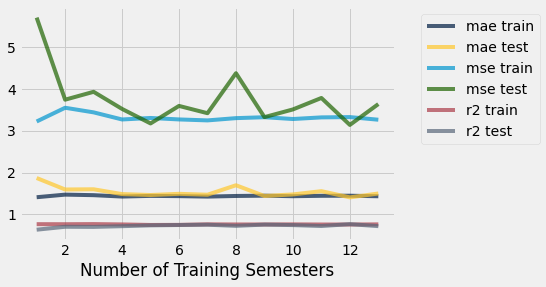

In [61]:
plot_error_score(df, columns, Ridge())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,1.423,2.033,3.703,6.561,0.734,0.581
2,1.345,1.509,3.411,3.415,0.776,0.731
3,1.308,1.819,3.245,5.241,0.783,0.604
4,1.303,1.54,3.058,3.988,0.778,0.683
5,1.312,1.28,3.048,2.612,0.769,0.786
6,1.295,1.546,2.995,3.871,0.772,0.729
7,1.237,1.407,2.787,3.371,0.797,0.758
8,1.241,1.53,2.814,3.872,0.796,0.759
9,1.241,1.415,2.816,3.393,0.797,0.753
10,1.223,1.403,2.758,3.471,0.801,0.749


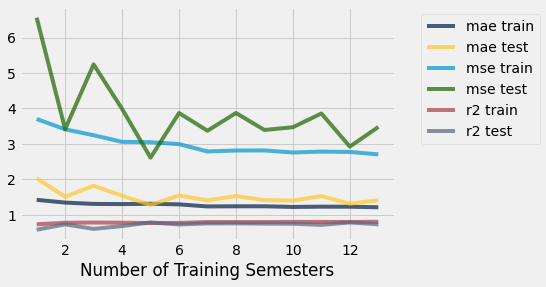

In [62]:
plot_error_score(df, columns, SVR())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,1.551,2.161,4.559,7.591,0.672,0.516
2,1.367,2.054,3.398,6.121,0.777,0.519
3,1.311,1.779,3.075,5.351,0.795,0.596
4,1.286,1.592,2.853,4.325,0.792,0.656
5,1.243,1.565,2.66,4.216,0.798,0.654
6,1.235,1.613,2.642,4.517,0.799,0.683
7,1.201,1.585,2.557,4.378,0.814,0.686
8,1.178,1.63,2.486,4.666,0.82,0.71
9,1.176,1.58,2.489,4.416,0.821,0.679
10,1.149,1.56,2.4,4.283,0.827,0.69


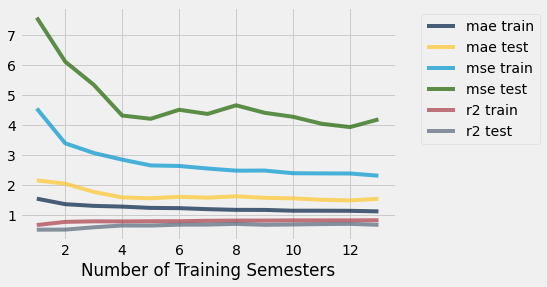

In [64]:
plot_error_score(df, columns, KNeighborsRegressor())